**Laporan Proyek Sistem Rekomendasi Buku**

**Nama: Elisa Ramadanti**

# **Project Overview**


**Latar Belakang** :

Sistem rekomendasi buku menjadi semakin penting di era digital, di mana jumlah buku yang tersedia sangat besar dan pengguna sering kali kesulitan menemukan buku yang sesuai dengan preferensi mereka. Sistem ini bertujuan untuk membantu pengguna menemukan buku yang relevan berdasarkan riwayat interaksi mereka, seperti rating atau pembelian.

**Pentingnya Proyek** :

Proyek ini penting karena:

1. Membantu pengguna menghemat waktu dalam mencari buku yang sesuai dengan minat mereka.
2. Meningkatkan pengalaman pengguna dalam menjelajahi konten baru.

**Riset/Referensi** : Sistem rekomendasi banyak digunakan di platform seperti Amazon, Goodreads, dan Google Books.

  *  [Amazons](https://www.amazon.com/?spm=5aebb161.2ef5001f.0.0.14b05171p7gXjn)
  *  [Google Books](https://books.google.com/)
  *  [Goodreads Recommendation System](https://www.goodreads.com/)

# **Business Understanding**

**Problem Statements**
  -  Bagaimana memberikan rekomendasi yang relevan berdasarkan riwayat interaksi pengguna (seperti rating atau pembelian)?

**Goals**
-  Mengembangkan sistem rekomendasi yang dapat memberikan rekomendasi buku yang akurat untuk meningkatkan kepuasan pengguna.

**Solution Approach**
-  Menggunakan Collaborative Filtering dengan merekomendasikan buku berdasarkan interaksi pengguna, seperti rating yang diberikan terhadap buku. Metode yang digunakan adalah Singular Value Decomposition (SVD) dari pustaka Surprise untuk memberikan rekomendasi berdasarkan pola interaksi pengguna lain yang memiliki preferensi serupa.

# **Data Understanding**

**Informasi Dataset:**

-  **Jumlah Data:** Dataset ini memiliki 6810 baris dan 12 kolom.

-  **Kondisi Data** :
    - Terdapat beberapa missing values pada kolom s*ubtitle, categories, thumbnail, description, published_year, average_rating, num_pages*, dan *ratings_count.*
    -  Tidak ada data duplikat berdasarkan pengecekan dengan df.duplicated().sum().
-  **Sumber Data:** Dataset ini diambil dari [Kaggle: Books Dataset](https://www.kaggle.com/datasets/abdallahwagih/books-dataset/data)

-  **Uraian Fitur Dataset:**
    - isbn13, isbn10: Identifikasi unik buku.
    - title, subtitle: Informasi tentang judul buku.
    - authors: Penulis buku.
    - categories: Kategori buku.
    - thumbnail: URL gambar sampul buku.
    - description: Deskripsi buku.
    - published_year: Tahun publikasi.
    - average_rating: Rating rata-rata buku.
    - num_pages: Jumlah halaman.
    - ratings_count: Jumlah rating yang diterima.


## **Import Library**

In [1]:
# Install Surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505183 sha256=8f4bf100fc3a42946a2ad3ee0e935507683390dd266b8106d1c186e7b7bc435e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
# Import Library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

**Download dataset**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/books-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.58M/1.58M [00:00<00:00, 45.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/books-dataset/versions/1


In [4]:
# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/abdallahwagih/books-dataset/versions/1"

# Check the contents of the directory to find the actual filename
print("Files in dataset directory:")
for filename in os.listdir(path):
    print(filename)

Files in dataset directory:
intents.json
data.csv


## **Data Loading**

In [5]:
# Load Dataset
filename = 'data.csv'
df = pd.read_csv(os.path.join(path, filename))
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


### **Informasi Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


**Insight**

-  Jumlah Data: 6810 entri, 12 kolom.
-  Tipe Data:
    1. Numerik: 4 kolom (published_year, average_rating, num_pages, ratings_count).
    2. Objek/Teks: 7 kolom (isbn10, title, subtitle, authors, categories, thumbnail, description).
    3. Integer: 1 kolom (isbn13).

**Menampilkan Missing Value**

In [7]:
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4429
authors,72
categories,99
thumbnail,329
description,262
published_year,6
average_rating,43


**insight**:

Berikut adalah jumlah missing values untuk setiap kolom:

1. subtitle: 4429 missing (sekitar 65% data hilang)
2. authors: 72 missing (sekitar 1% data hilang)
3. categories: 99 missing (sekitar 1% data hilang)
4. thumbnail: 329 missing (sekitar 5% data hilang)
5. description: 262 missing (sekitar 4% data hilang)
6. published_year: 6 missing (hampir tidak ada missing value)
7. average_rating: 43 missing (sekitar 0.6% data hilang)
8. num_pages: 43 missing (sekitar 0.6% data hilang)
9. ratings_count: 43 missing (sekitar 0.6% data hilang)

-  Kolom isbn13, isbn10, dan title tidak memiliki missing values

**Menampilkan Data Duplikat**

In [8]:
df.duplicated().sum()

0

**Insight:**

Tidak memiliki data duplikat

**Visualisasi Distribusi Rating**

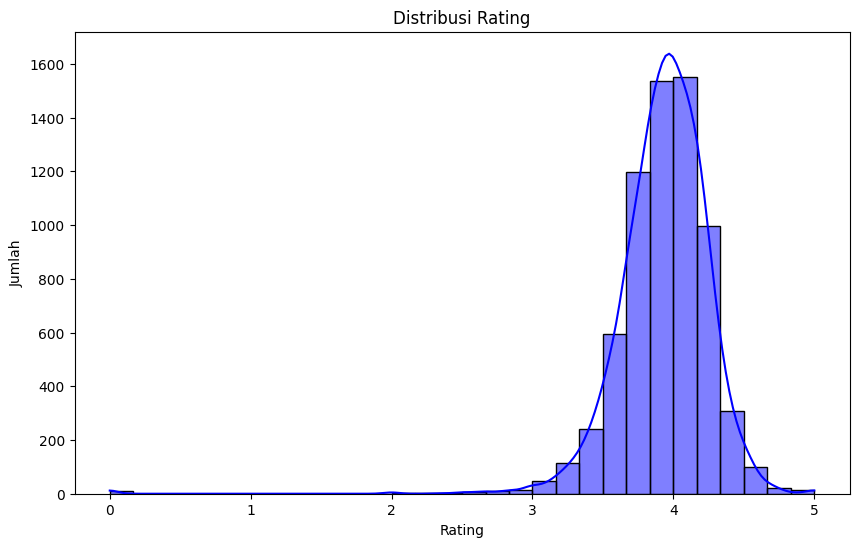

In [9]:
# Visualisasi Distribusi Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=30, kde=True, color='blue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

**Insight :**

Sebagian besar buku memiliki rating terbanyak di antara 3.5 hingga 4.5.

# **Data Preprocessing**

**Penambahan user_id Berdasarkan Indeks**

In [10]:
# Tambahkan user_id berdasarkan indeks
df['user_id'] = df.index

**Insight:**

Memberikan identifier unik untuk setiap user menggunakan indeks dataframe.

**Menangani missing values**

In [30]:
df_cleaned = df.dropna(subset=['ratings_count', 'average_rating'])

**Insight:**

Menghapus missing values pada kolom average_rating dan ratings_count agar tidak memengaruhi perhitungan dalam sistem rekomendas

**Konversi Tipe Data**

In [22]:
# Konversi tipe data agar sesuai untuk Collaborative Filtering
df_cleaned.loc[:, 'isbn13'] = df_cleaned['isbn13'].astype(str)
df_cleaned.loc[:, 'user_id'] = df_cleaned['user_id'].astype(str)

**Insight**:

Mengonversi tipe data isbn13 dan user_id menjadi string untuk memastikan konsistensi

In [31]:
# Cek data setelah pembersihan
print("\nData Setelah Pembersihan:")
df_cleaned[['user_id', 'isbn13', 'ratings_count','average_rating']].head()


Data Setelah Pembersihan:


,user_id,isbn13,ratings_count,average_rating
0,0,9780002005883,361.0,3.85
1,1,9780002261982,5164.0,3.83
2,2,9780006163831,172.0,3.97
3,3,9780006178736,29532.0,3.93
4,4,9780006280897,33684.0,4.15


### **Collaborative Filltering Preparation**

In [33]:
# Persiapkan data untuk Surprise Library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_cleaned[['user_id', 'isbn13', 'average_rating']], reader)

**Insight:**

Collaborative Filtering menggunakan User-Item Matrix yang dibangun dari isbn13, dan average_rating

**Split data**

In [15]:
# Split data menjadi train dan test set
trainset, testset = train_test_split(data, test_size=0.2)

Data dibagi menjadi dua bagian: **Train Set** dan **Test Set** dengan proporsi **80% untuk Train Set** dan **20% untuk Test Set**.  

# **Modeling**

Pada tahap ini, akan mengimplementasikan pendekatan sistem rekomendasi: **Collaborative Filtering**

**Collaborative Filtering**

*   **Cara Kerja:** Merekomendasikan buku berdasarkan pola interaksi pengguna lain yang serupa (misalnya, rating atau pembelian).

*   **Algoritma yang Digunakan:** Singular Value Decomposition (SVD) dari pustaka Surprise.

**Proses ini menggunakan algoritma SVD (Singular Value Decomposition) untuk melakukan Collaborative Filtering.**

In [16]:
# Gunakan algoritma SVD untuk Collaborative Filtering
algo = SVD()

**insight**:

SVD adalah teknik dekomposisi matriks yang digunakan untuk mengurangi dimensi data dan menangkap pola interaksi pengguna

In [17]:
# Train model menggunakan seluruh data
trainset = data.build_full_trainset()
algo.fit(trainset)

In [18]:
# Fungsi untuk memberikan rekomendasi
def recommend_books(user_id, n_recommendations=5):
    # Ambil list ISBN yang pernah dirating user
    rated_books = df_cleaned[df_cleaned['user_id'] == user_id]['isbn13'].tolist()
    all_books = df_cleaned['isbn13'].unique()

    # Prediksi rating untuk semua buku yang belum pernah dirating
    predictions = []
    for book in all_books:
        if book not in rated_books:
            pred = algo.predict(user_id, book)
            predictions.append((book, pred.est))

    # Urutkan prediksi berdasarkan rating tertinggi
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Ambil top-N rekomendasi
    recommended_books = predictions[:n_recommendations]
    return recommended_books

In [27]:
# Contoh penggunaan fungsi rekomendasi
user_id = '3' # Input User
recommended_books = recommend_books(user_id)

print(f"Rekomendasi Buku untuk User: {user_id}")
print("| Rank | Judul Buku                       | Prediksi Rating |")
print("|------|----------------------------------|-----------------|")
for rank, (isbn, rating) in enumerate(recommended_books, start=1):
    book_title = df[df['isbn13'] == int(isbn)]['title'].values[0]
    print(f"|    {rank} | {book_title[:30]:<32} | {rating:.2f}            |")

Rekomendasi Buku untuk User: 3
| Rank | Judul Buku                       | Prediksi Rating |
|------|----------------------------------|-----------------|
|    1 | Justine                          | 4.28            |
|    2 | Babar the King                   | 4.28            |
|    3 | Children of the Mind             | 4.27            |
|    4 | Night of the Long Shadows        | 4.27            |
|    5 | The Kate DiCamillo Collection    | 4.27            |


<ipython-input-36-ca686cc7471b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings, y=book_titles, palette='Blues')


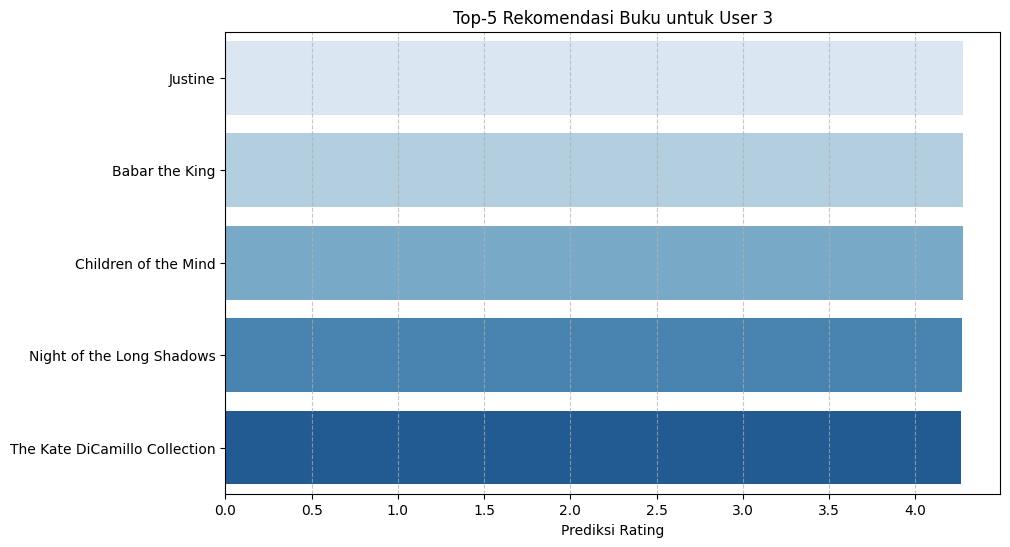

In [36]:
# Fungsi untuk menampilkan visualisasi Top-N Rekomendasi
def visualize_recommendations(recommended_books, n_recommendations=5):
    # Ambil judul buku dan prediksi rating
    book_titles = []
    ratings = []

    for isbn, rating in recommended_books:
        title = df[df['isbn13'] == int(isbn)]['title'].values[0]
        book_titles.append(title[:30])  # Maksimal 30 karakter untuk judul
        ratings.append(rating)

    # Membuat bar plot menggunakan Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ratings, y=book_titles, palette='Blues')
    plt.xlabel('Prediksi Rating')
    plt.title(f'Top-{n_recommendations} Rekomendasi Buku untuk User {user_id}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Contoh penggunaan visualisasi
visualize_recommendations(recommended_books)

# **Evaluation**

**Evaluasi ini menggunakan:**

-  RMSE (Root Mean Square Error): Mengukur rata-rata kesalahan kuadrat.
-  MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut.

**Evaluasi Model menggunakan Test Set**

In [24]:
# Evaluasi model pada test set
predictions = algo.test(testset)
print("\nEvaluasi Model:")
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


Evaluasi Model:
RMSE: 0.2473
MAE:  0.1736


**Insight:**

-  RMSE (Root Mean Squared Error) = 0.2473 dan MAE (Mean Absolute Error) = 0.1736 menunjukkan bahwa model memiliki error yang relatif rendah dalam memprediksi rating pengguna.
- Nilai MAE yang lebih kecil dari RMSE mengindikasikan bahwa sebagian besar prediksi cukup akurat, namun ada beberapa error yang lebih besar yang mempengaruhi RMSE.

**Evaluasi dilakukan menggunakan Cross Validation dengan metrik RMSE dan MAE.**

In [21]:
# Evaluasi model dengan Cross Validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3168  0.3391  0.3756  0.3195  0.3009  0.3304  0.0257  
MAE (testset)     0.2175  0.2365  0.2368  0.2333  0.2318  0.2312  0.0071  
Fit time          0.23    0.22    0.25    0.26    0.42    0.27    0.07    
Test time         0.01    0.23    0.02    0.01    0.02    0.06    0.08    


{'test_rmse': array([0.31677573, 0.33906936, 0.37560471, 0.31948199, 0.30085986]),
 'test_mae': array([0.21752113, 0.23645734, 0.23680166, 0.23328716, 0.23181476]),
 'fit_time': (0.23003578186035156,
  0.2176969051361084,
  0.25052571296691895,
  0.25729894638061523,
  0.4176971912384033),
 'test_time': (0.014872312545776367,
  0.22543048858642578,
  0.023247957229614258,
  0.010698795318603516,
  0.01556706428527832)}

**Insight:**
-  Hasil evaluasi menunjukkan Rata-rata RMSE = 0.3304 dan MAE = 0.2312 pada 5-fold cross-validation menunjukkan performa yang cukup konsisten di setiap fold.


# **Conclusion**

- Sistem rekomendasi buku berhasil dibangun menggunakan Collaborative Filtering dengan metode SVD.
- Model memberikan rekomendasi yang relevan berdasarkan pola interaksi pengguna lain yang memiliki preferensi serupa.
- Hasil evaluasi menunjukkan RMSE sebesar 0.2473 dan MAE sebesar 0.1736, menandakan prediksi yang akurat.
- Top-5 rekomendasi buku berhasil ditampilkan dengan prediksi rating tertinggi bagi pengguna.
- Sistem ini membantu pengguna menemukan buku yang sesuai dengan preferensi mereka, meningkatkan pengalaman membaca.